### 3I005 Statistique et informatique -- DaoQuocHiep et BabaaliDhiya

# Projet 1 : Exploration / Exploitation

## Partie 1 : Bandits manchots

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Fonction de jeu  :

In [2]:
def jouer(machine, action):
    """ Simule l'action d'un levier sur une machine
    - machine : liste des distributions de récompense de chaque levier
    - action : indice du levier choisi
    retourne la récompense obtenue
    """
    proba = machine[action]
    n = random.random()
    if n < proba :
        return 1
    else :
        return 0

Test de la fonction :

In [5]:
jouer([0, 0.5, 0.7, 0.1, 1], 2)

1

### Algorithmes de choix :

#### Aglorithme aléatoire :

In [3]:
def algo_aleatoire(moyennes_estim, liste_ni):
    """ Choisit uniformément parmis toutes les actions possibles
    - moyennes_estim : liste des récompenses moyennes estimées
    - list_ni : liste contemant le nombre de fois où chaque levier a été joué
    retourne l'action choisie """
    return random.randint(0,len(moyennes_estim)-1)

#### Algorithme greedy :

In [4]:
#Constante
n = 500 #nombre d'itérations consacrées à l'itération

def algo_greedy(moyennes_estim, liste_ni):
    """ Choisit une action en suivant l'algorithme greedy
    - moyennes_estim : liste des récompenses moyennes estimées
    - list_ni : liste contenant le nombre de fois où chaque levier a été joué
    retourne l'action choisie """  
    if np.sum(liste_ni) < n : #EXPLORATION
        return algo_aleatoire(moyennes_estim, liste_ni)
    else : #EXPLOITATION
        return np.argmax(moyennes_estim)

#### Algorithme e-greedy :

In [5]:
#Constante
epsilon = 0.5

def algo_e_greedy(moyennes_estim, liste_ni):
    """ Choisit une action en suivant l'algorithme e-greedy
    - moyennes_estim : liste des récompenses moyennes estimées
    - list_ni : liste contenant le nombre de fois où chaque levier a été joué
    retourne l'action choisie """
    i = random.random()
    if i<epsilon : #EXPLORATION
        return algo_aleatoire(moyennes_estim, liste_ni)
    else : #EXPLOITATION
        return np.argmax(moyennes_estim)

#### Algorithme UCB :

In [6]:
def algo_ucb(moyennes_estim, liste_ni):
    """ Choisit une action en suivant l'algorithme UCB
    - moyennes_estim : liste des récompenses moyennes estimées
    - list_ni : liste contemant le nombre de fois où chaque levier a été joué
    retourne l'action choisie """
    t = np.sum(liste_ni) #temps
    
    for i in range(len(liste_ni)): #On teste 1 fois chaque levier pour s'assurer de ne pas avoir de valeur nulle dans liste_ni
        if liste_ni[i] ==  0 :
            return i
        
    liste_ucb = [moyennes_estim[i] + math.sqrt(2*math.log(t)/liste_ni[i]) for i in range(len(moyennes_estim))]
    
    return np.argmax(liste_ucb)

#### Simulation

In [7]:
def simulation(algorithme, machine, nb_iterations):
    """Simule un jeu de machines à sous : On tire sur les leviers en suivant un algorithme choisi
    Affiche les estimations trouvées pour chaque levier et le regret en fonction du temps
    - algorithme : algorithme choisi
    - machine : liste des probalités de gagner par levier
    - nb_iterations : nombre de tirages"""
    
    moyennes_estim = np.array([0.0 for i in range(len(machine))])
    liste_gains = np.array([0.0 for i in range(len(machine))])
    liste_ni = np.array([0 for i in range(len(machine))])
    liste_regret = np.array([0 for i in range(nb_iterations)])
    gain_ideal = 0
    action_ideale = np.argmax(machine)
    
    for i in range(nb_iterations):
        action = algorithme(moyennes_estim, liste_ni)
        gain = jouer(machine, action)
        gain_ideal += jouer(machine, action_ideale)
        liste_gains[action] += gain
        liste_ni[action] += 1
        moyennes_estim[action] = round(liste_gains[action] / liste_ni[action], 2)
        liste_regret[i] = gain_ideal-np.sum(liste_gains)
    print("Résultats de la simulation :\n")
    print("machine : \n", machine, sep=" ")
    print("moyennes estimées : \n", moyennes_estim, sep=" ")
    print("\nRegret en fonction du temps :")
    plt.plot([i for i in range(nb_iterations)], liste_regret)
    plt.xlabel("Temps")
    plt.ylabel("Regret")
    plt.show()

### Tests :

In [11]:
machineTest = [0.7, 0.5, 0.25, 1, 0.4, 0.9]
T = 50

Résultats de la simulation :

machine : 
 [0.7, 0.5, 0.25, 1, 0.4, 0.9]
moyennes estimées : 
 [0.75 0.5  0.21 1.   0.32 0.89]

Regret en fonction du temps :


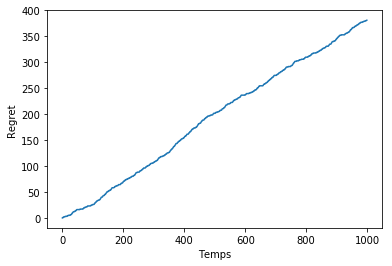

In [12]:
simulation(algo_aleatoire, machineTest, 1000)

On observe que le regret augmente de façon linéaire.

Résultats de la simulation :

machine : 
 [0.7, 0.5, 0.25, 1, 0.4, 0.9]
moyennes estimées : 
 [0.58 0.53 0.21 1.   0.4  0.91]

Regret en fonction du temps :


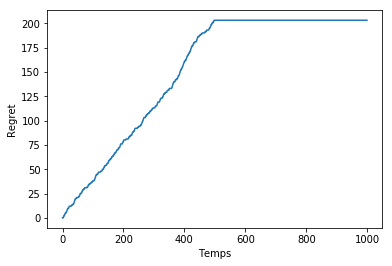

In [13]:
simulation(algo_greedy, machineTest, 1000)

La courbe du regret en fonction du temps est linéaire pendant la phase d'exploration, puis se stabilise lorsqu'il passe à l'exploitation, à condition qu'il ait bien trouvé la bonne machine.

Résultats de la simulation :

machine : 
 [0.7, 0.5, 0.25, 1, 0.4, 0.9]
moyennes estimées : 
 [0.75 0.47 0.27 1.   0.4  0.84]

Regret en fonction du temps :


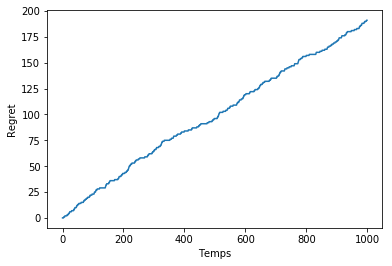

In [14]:
simulation(algo_e_greedy, machineTest, 1000)

Le regret est linéaire par rapport au temps mais la pente de la courbe est plus faible qu'avec l'algorithme aléatoire.

Résultats de la simulation :

machine : 
 [0.7, 0.5, 0.25, 1, 0.4, 0.9]
moyennes estimées : 
 [0.69 0.47 0.24 1.   0.33 0.89]

Regret en fonction du temps :


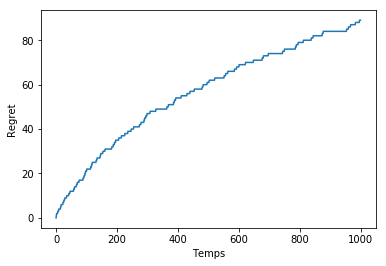

In [15]:
simulation(algo_ucb, machineTest, 1000)

Regret faible par rapport aux autres algorithmes -> c'est l'algorithme le plus efficace

## Partie 2 : Morpion et Monte-Carlo

In [8]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
%matplotlib inline 
## Constante
OFFSET = 0.2

In [9]:
class State:
    """ Etat generique d'un jeu de plateau. Le plateau est represente par une matrice de taille NX,NY,
    le joueur courant par 1 ou -1. Une case a 0 correspond a une case libre.
    * next(self,coup) : fait jouer le joueur courant le coup.
    * get_actions(self) : renvoie les coups possibles
    * win(self) : rend 1 si le joueur 1 a gagne, -1 si le joueur 2 a gagne, 0 sinon
    * stop(self) : rend vrai si le jeu est fini.
    * fonction de hashage : renvoie un couple (matrice applatie des cases, joueur courant).
    """
    NX,NY = None,None
    def __init__(self,grid=None,courant=None):
        self.grid = copy.deepcopy(grid) if grid is not None else np.zeros((self.NX,self.NY),dtype="int")
        self.courant = courant or 1
    def next(self,coup):
        pass
    def get_actions(self):
        pass
    def win(self):
        pass
    def stop(self):
        pass
    @classmethod
    def fromHash(cls,hash):
        return cls(np.array([int(i)-1 for i in list(hash[0])],dtype="int").reshape((cls.NX,cls.NY)),hash[1])
    def hash(self):
        return ("".join(str(x+1) for x in self.grid.flat),self.courant)

In [10]:
class Jeu:
    """ Jeu generique, qui prend un etat initial et deux joueurs.
        run(self,draw,pause): permet de joueur une partie, avec ou sans affichage, avec une pause entre chaque coup. 
                Rend le joueur qui a gagne et log de la partie a la fin.
        replay(self,log): permet de rejouer un log
    """
    def __init__(self,init_state = None,j1=None,j2=None):
        self.joueurs = {1:j1,-1:j2}
        self.state = copy.deepcopy(init_state)
        self.log = None
    def run(self,draw=False,pause=0.5):
        log = []
        if draw:
            self.init_graph()
        while not self.state.stop():
            coup = self.joueurs[self.state.courant].get_action(self.state)
            log.append((self.state,coup))
            self.state = self.state.next(coup)
            if draw:
                self.draw(self.state.courant*-1,coup)
                plt.pause(pause)
        return self.state.win(),log
    def init_graph(self):
        self._dx,self._dy  = 1./self.state.NX,1./self.state.NY
        self.fig, self.ax = plt.subplots()
        for i in range(self.state.grid.shape[0]):
            for j in range(self.state.grid.shape[1]):
                self.ax.add_patch(patches.Rectangle((i*self._dx,j*self._dy),self._dx,self._dy,\
                        linewidth=1,fill=False,color="black"))
        plt.show(block=False)
    def draw(self,joueur,coup):
        color = "red" if joueur>0 else "blue"
        self.ax.add_patch(patches.Rectangle(((coup[0]+OFFSET)*self._dx,(coup[1]+OFFSET)*self._dy),\
                        self._dx*(1-2*OFFSET),self._dy*(1-2*OFFSET),linewidth=1,fill=True,color=color))
        plt.draw()
    def replay(self,log,pause=0.5):
        self.init_graph()
        for state,coup in log:
            self.draw(state.courant,coup)
            plt.pause(pause)

In [11]:
class MorpionState(State):
    """ Implementation d'un etat du jeu du Morpion. Grille de 3X3. 
    """
    NX,NY = 3,3
    def __init__(self,grid=None,courant=None):
        super(MorpionState,self).__init__(grid,courant)
    def next(self,coup):
        state =  MorpionState(self.grid,self.courant)
        state.grid[coup]=self.courant
        state.courant *=-1
        return state
    def get_actions(self):
        return list(zip(*np.where(self.grid==0)))
    def win(self):
        for i in [-1,1]:
            if ((i*self.grid.sum(0))).max()==3 or ((i*self.grid.sum(1))).max()==3 or ((i*self.grid)).trace().max()==3 or ((i*np.fliplr(self.grid))).trace().max()==3: return i
        return 0
    def stop(self):
        return self.win()!=0 or (self.grid==0).sum()==0
    def __repr__(self):
        return str(self.hash())

In [12]:
class Agent:
    """ Classe d'agent generique. Necessite une methode get_action qui renvoie l'action correspondant a l'etat du jeu state"""
    def __init__(self):
        pass
    def get_action(self,state):
        pass

### Implémentation du jouer Aléatoire :

In [17]:
class Joueur_Aleatoire(Agent):
    """ Heriter la class Agent
    """
    def __init__(self,nom):
        self.nom = nom
    
    def get_action(self,state):
        liste_case_possible = state.get_actions() #recupere la liste des cases vides
        lancer = random.randint(0,len(liste_case_possible)-1) #choisir un index aléatoire des case possibles
        return liste_case_possible[lancer] #retourner la case

### Implémentation du jouer Monte Carlo:

In [18]:
class Joueur_MonteCarlo(Agent):
    """ Heriter la class Agent
    """
    def __init__(self,nom):
        self.nom = nom
        
    #def update_recompense(recompense,action,joueur_courant,res):
    #    index_i = action[0]
    #    index_j = action[1]
    #    if  joueur_courant == res:
    #        recompense[i][j] = recompense[index_i][index_j] + 1
    #    elif joueur_courant != res and res != 0:
    #        recompense[i][j] = recompense[index_i][index_j] - 1

    
    def get_action(self,state):
        
        N=5
        liste_case_possible = state.get_actions() #recupere la liste des cases vides
        n = len(liste_case_possible)
        
        res = np.zeros(n)
        parties = np.zeros(n)
        j_1 = Joueur_Aleatoire('af')
        j_2 = Joueur_Aleatoire('bs')
        for i in range(N):
            
            joueur_courant = state.courant
            lancer = random.randint(0,len(liste_case_possible)-1) #choisir un index aléatoire des case possibles
            action = liste_case_possible[lancer] #retourner la case

            jeu = Jeu(state.next(action),j_1,j_2)
            resultat_partie = jeu.run()[0]
            if  joueur_courant == resultat_partie: #resultat du jeu soit 1 -1 0
                res[lancer] = float(float(res[lancer]*parties[lancer]+1)/float(parties[lancer]+1))
            parties[lancer] +=1
        return liste_case_possible[np.argmax(res)]

### Implémentation du jouer Monte Carlo Tree Search:

In [20]:
class AgentMTTS(Agent):
    """
    """
    def __init__(self, n = 20):
        super(AgentMTTS, self).__init__()
        self.N = n
    
    def get_action(self, state):
        #initialisation du noeud racine
        racine = Noeud(state)
        #initialisation du joueur aleatoire
        j1 = Joueur_Aleatoire('j_1')
        
        #recuperation des coups possibles a partir de state
        coups_possibles = state.get_actions()
        
        #creation de noeuds representant tous les coups possibles en sortant de la racine
        #on joue une fois aléatoirement a partir des coups possibles pour remplir les noeuds
        for i in range(len(coups_possibles)):
            state_try = state.next(coups_possibles[i])
            enfant = Noeud(state_try, racine)
            racine.kids[coups_possibles[i]] = enfant
            jeu = Jeu(state_try, j1, j1)
            victoire, _ = jeu.run()
            enfant.maj(-victoire)
        
        for i in range(self.N * len(coups_possibles)):
            nd = racine
            #print("wins racine =" + str(nd.wins))
            #print("total racine =" + str(nd.total))
            nd = nd.choix_ucb()
            jeu = Jeu(nd.state, j1, j1)
            victoire, _ = jeu.run()
            #print(nd.state.courant)
            nd.maj(-victoire)
       # print("fin d'un tour \n")
        return max(racine.kids, key = lambda k: racine.kids[k].loss/racine.kids[k].total)

In [22]:
class Noeud:
    """
    """
    def __init__(self, state, parent = None):
        self.state = state
        self.parent = parent
        self.kids = {}
        self.loss = 0
        self.total = 0
        
    def maj(self, i):
        self.loss += i * self.state.courant
        self.total += 1
        if self.parent is not None:
            self.parent.maj(i)
        
    def choix_ucb(self):
        #recuperation du state lie au noeud courant
        state_par = self.state
        #si on est dans un state terminal, on retourne le noeud courant
        if state_par.stop():
            return self
        #on teste si la liste des enfants de ce noeud a ete deja initialise.
        #si c'est pas le cas, on l'initialise
        if self.kids == {}:
            cp = state_par.get_actions()
            for i in range (len(cp)):
                state_try = state_par.next(cp[i])
                enfant = Noeud(state_try, self)
                self.kids[cp[i]] = enfant 
        #s'il y a un enfant qui n'a pas encore ete testé (total = 0), on le retourne
        for i in self.kids:
            if self.kids[i].total == 0:
                return self.kids[i]
        #tous les enfants on ete visités au moins un fois, on aplique l'algo UCB
        #et on appele la fonction de façon recursive sur l'enfant choisi    
        t = sum([noeud.total for noeud in self.kids.values()])
        #print(max(self.kids, key = lambda k: self.kids[k].wins / self.kids[k].total + np.sqrt(2*np.log(t)/ self.kids[k].total)))
        return self.kids[max(self.kids, key = lambda k: self.kids[k].loss / self.kids[k].total + np.sqrt(2*np.log(t)/ self.kids[k].total))].choix_ucb()

### Simulation:

In [36]:
def N_run(j1, j2, N = 200):
    """
    Simule N parties d'un jeu du Morphion et retourne 3 tableaux avec les gains
    du premier joueur, du deuxième joueur et de matchs muls en N parties.
    """
    vic_1 = np.zeros(N)
    vic_2 = np.zeros(N)
    nul = np.zeros(N)  
    for i in range(N):
        state = MorpionState()
        jeu = Jeu(state, j1, j2)
        victoire, _ = jeu.run()
        nul[i] = nul[i - 1] + (victoire == 0)
        vic_1[i] = vic_1[i - 1] + (victoire == 1)
        vic_2[i] = vic_2[i - 1] + (victoire == -1)
    return vic_1, vic_2, nul


def graphe_victoires(j1, j2, N = 200):
    """
    Cree un graphe d'evolution des gains des 2 joueurs (et matchs muls) en N parties du jeu du Morpion.
    """    
    vic_1, vic_2, nul = N_run(j1, j2, N)
    T = np.arange(N)
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("N") 
    ax.plot(T, vic_1, label = 'victoire j1') 
    ax.plot(T, vic_2, label = 'victoire j2') 
    ax.plot(T, nul, label = 'nul') 
    ax.legend(loc = "upper left")
    
def graphe_vic_moy(j1, j2, N = 200):
    """
    Cree un graphe d’évolution de la moyenne du nombre de partie gagnée du premier joueur,
    deuxième joueur et des matchs nuls en N parties du jeu du Morpion.
    """    
    vic_1, vic_2, nul = N_run(j1, j2, N)
    T = np.arange(N) + 1
    vic_1 = vic_1 / T
    vic_2 = vic_2 / T   
    nul= nul / T
    
    print('proba j1:',np.sum(vic_1)/len(T))
    print('proba j2:',np.sum(vic_2)/len(T))
    print('proba match null:',np.sum(nul)/len(T))
    
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("N") 
    ax.plot(T, vic_1, label = 'victoire j1') 
    ax.plot(T, vic_2, label = 'victoire j2') 
    ax.plot(T, nul, label = 'nul') 
    ax.legend(loc = "upper left")

### Test : 

#### Joueur aléatoire contre joueur aléatoire

proba j1: 0.6189747625839539
proba j2: 0.2648243584623001
proba match null: 0.11620087895374612


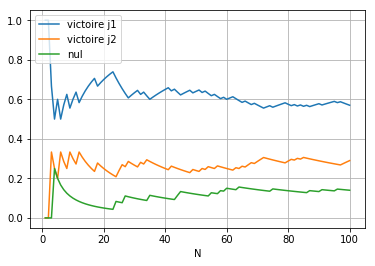

In [39]:
j1 = Joueur_Aleatoire('a')
j2 = Joueur_Aleatoire('b')
N = 100
graphe_vic_moy(j1, j2, N)

Le premier joueur gagne plus que le dexième joueur quand les deux jouent aléatoirement, Ce qui joue au premier a plus advantage de gagner. 

#### Joueur aléatoire contre joueur Monte Carlo

proba j1: 0.32698322854744555
proba j2: 0.6728157613515444
proba match null: 0.00020101010101010103


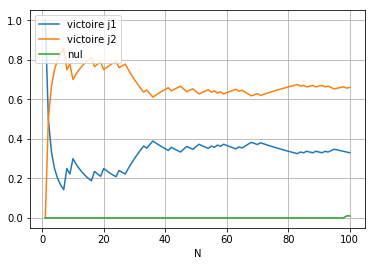

In [40]:
j1 = Joueur_Aleatoire('a')
j2 = Joueur_MonteCarlo('b')
N = 100
graphe_vic_moy(j1, j2, N)

#### Joueur Monte Carlo contre joueur aléatoire

proba j1: 0.7861386884831775
proba j2: 0.09203939420457935
proba match null: 0.1218219173122431


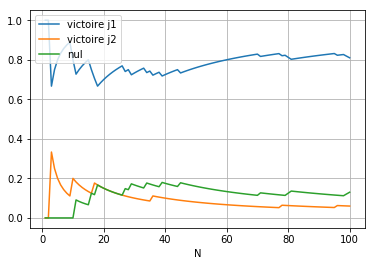

In [41]:
j1 = Joueur_MonteCarlo('a')
j2 = Joueur_Aleatoire('b')
N = 100
graphe_vic_moy(j1, j2, N)

Dans les deux cas, on trouve que le joueur Monte Carlo a une propabilité gagnée plus grande que le joueur aléatoire

#### Joueur  Monte Carlo contre joueur Monte Carlo

proba j1: 0.6185468824286345
proba j2: 0.3565474753771952
proba match null: 0.02490564219417025


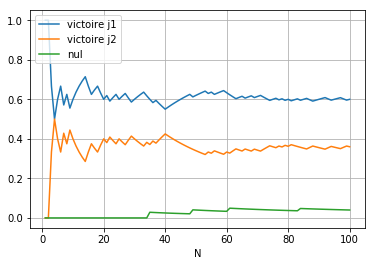

In [42]:
j1 = Joueur_MonteCarlo('a')
j2 = Joueur_MonteCarlo('b')
N = 100
graphe_vic_moy(j1, j2, N)

Commentaire : (ajouter)

#### Joueur Monte Carlo Research Tree contre joueur Monte Carlo

proba j1: 0.9880760961328078
proba j2: 0.0
proba match null: 0.011923903867192292


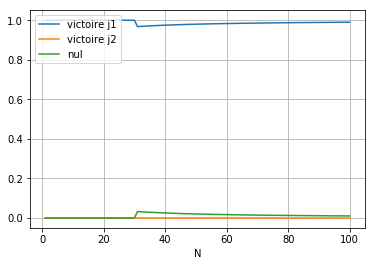

In [45]:
j1 = AgentMTTS()
j2 = Joueur_MonteCarlo('b')
N = 100
graphe_vic_moy(j1, j2, N)

#### Joueur Monte Carlo contre joueur Monte Carlo Research Tree

proba j1: 0.07470144509855296
proba j2: 0.7368143000024554
proba match null: 0.18848425489899154


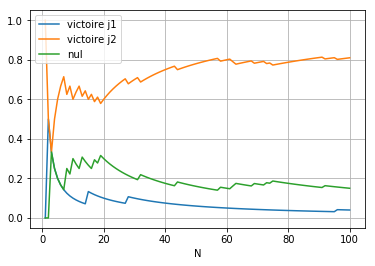

In [47]:
j1 = Joueur_MonteCarlo('b')
j2 = AgentMTTS()
N = 100
graphe_vic_moy(j1, j2, N)

Commentaire : (ajouter)

#### Joueur Aléatoire contre joueur Monte Carlo Research Tree

proba j1: 0.0
proba j2: 0.920726223293117
proba match null: 0.07927377670688301


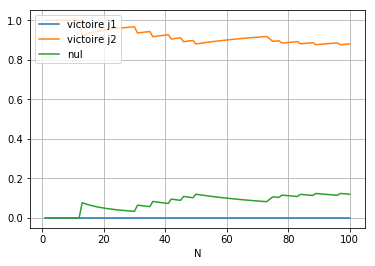

In [48]:
j1 = Joueur_Aleatoire('b')
j2 = AgentMTTS()
N = 100
graphe_vic_moy(j1, j2, N)

Commentaire : (ajouter)